In [21]:
from svg.path import Path, Move, Line, Arc, CubicBezier, QuadraticBezier, parse_path


In [22]:
svgpath = """M 4 8 L 10 1 L 13 0 L 12 3 L 5 9 C 6 10 6 11 7 10 C 7 11 8 12 7 12 A 1.42 1.42 0 0 1 6 13 A 5 5 0 0 0 4 10 Q 3.5 9.9 3.5 10.5 T 2 11.8 T 1.2 11 T 2.5 9.5 T 3 9 A 5 5 90 0 0 0 7 A 1.42 1.42 0 0 1 1 6 C 1 5 2 6 3 6 C 2 7 3 7 4 8 M 10 1 L 10 3 L 12 3 L 10.2 2.8 L 10 1
"""

In [23]:
path = parse_path(svgpath)
n=100;

In [24]:
pts = [(p.real, p.imag) for p in (path.point(i/n) for i in range(0,n+1))]

In [25]:
import matplotlib.pyplot as plt

In [26]:
x ,y = [],[]
for i in range(0,len(pts)):
     x.append(pts[i][0])
     y.append(pts[i][1])

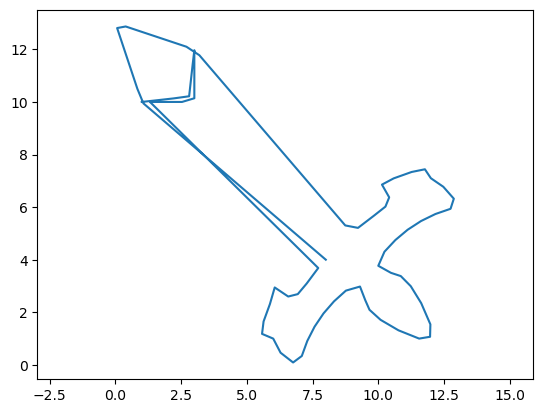

In [27]:
plt.axis('equal');
plt.plot(y,x)

In [62]:
import cmath
t_fin = 1;
delt = t_fin/n;
n_limit = 650
def f(t):
    return complex(x[(int)(t/delt)] ,y[(int)(t/delt)])

In [63]:
import numpy as np
c=[];
no_frames = 0;
for i in range(0,n_limit,1):
    no_frames= 0
    g = 0
    j = 0
    while j<=t_fin:
        g  = g + f(j)*cmath.exp(complex(0,-1*i)*2*np.pi*j)*delt
        j+= delt
        no_frames+=1;
    c.append(g)

In [64]:
no_frames

100

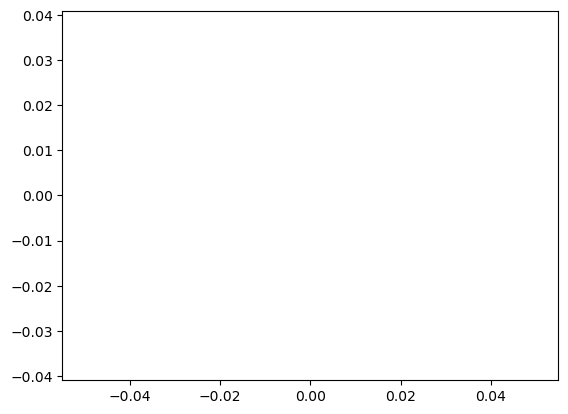

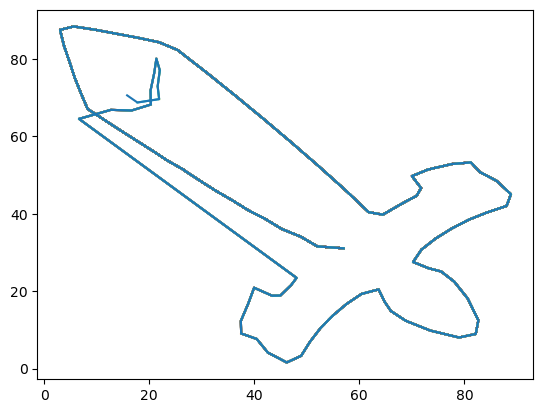

In [65]:
import matplotlib.animation as animation


plt.axis('equal')
fig = plt.figure()

xdata, ydata = [], []
j=0;
X=0
Y = 0
def animate(i):
    fourier = 0
    for j in range(0,n_limit):
        fourier+= c[j]*cmath.exp(complex(0,j)*2*np.pi*(i*delt));
 
    X = fourier.real
    Y = fourier.imag
#     print(i," ",x," ",y)
    
    xdata.append(X)
    ydata.append(Y)
    plt.plot(ydata,xdata)

 
   
anim = animation.FuncAnimation(fig, animate,
                            frames = no_frames,
                            interval =1)
 

# anim.save('test.gif', writer='Pillow', fps=60)
anim.save('ft2.mp4', writer = 'ffmpeg', fps = 30)

In [66]:
f(0)

(4+8j)

In [67]:
f(delt)

(4.3964053685679145+7.537527070004099j)

In [34]:
f(2*delt)

(4.792810737135829+7.0750541400081985j)